In [ ]:
# !pip install nb_black
# %load_ext lab_black

# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 


## Изучение данных

In [ ]:
import pandas as pd
import numpy as np
import math
import scipy 
from matplotlib.ticker import (    PercentFormatter,)  # чтоб оси на графике превращать в проценты
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from io import BytesIO
import requests
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D

spreadsheet_id = "1pPUee8c3JP30bVMbN_-sIyeqimz3uP4Cq8-hhJO_ZUU"
file_name = "https://docs.google.com/spreadsheets/d/{}/export?format=csv".format(
    spreadsheet_id
)
r = requests.get(file_name)
df_calls = pd.read_csv(BytesIO(r.content))

spreadsheet_id = "1tIw-U_lMH1xSlw6jRYQleQ1djsurcqkQSAVGju3brZs"
file_name = "https://docs.google.com/spreadsheets/d/{}/export?format=csv".format(
    spreadsheet_id
)
r = requests.get(file_name)
df_net = pd.read_csv(BytesIO(r.content))

spreadsheet_id = "1ZtKHLUbEAIDoaLGe1MKD_6AVptmQ31eLZRkO161QM6s"
file_name = "https://docs.google.com/spreadsheets/d/{}/export?format=csv".format(
    spreadsheet_id
)
r = requests.get(file_name)
df_sms = pd.read_csv(BytesIO(r.content))

spreadsheet_id = "19Vs6Ynf2zeUUKEIV3QKTXqV4hRJvAQNrOzXOj8Kl34E"
file_name = "https://docs.google.com/spreadsheets/d/{}/export?format=csv".format(
    spreadsheet_id
)
r = requests.get(file_name)
df_tarif = pd.read_csv(BytesIO(r.content))

spreadsheet_id = "1ViY5DZZJi81vkVZVhePUrwT6HT5W_Nb3tAXOjAMH38I"
file_name = "https://docs.google.com/spreadsheets/d/{}/export?format=csv".format(
    spreadsheet_id
)
r = requests.get(file_name)
df_users = pd.read_csv(BytesIO(r.content))


pd.options.display.max_columns = 100  # чтоб выводил все столбцы на экран
plt.rcParams["figure.figsize"] = (
    12,
    6,
)  # установить единый размер графиков по умолчанию

# цвета для тарифов
color1 = "red"  
color2 = "blue"

Получим общую информацию о таблицах:

In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [ ]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
df_tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Итак, 

согласно документации к данным:

Таблица `df_uses` (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица `df_calls` (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица `df_sms` (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица `df_net` (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица `df_tariff` (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



В каждой из таблиц кроме `df_tarif` надо поменять тип данных в колонке с датой на тип datetime, чтобы с этими данными можно было проводить дальнейшие работы.

Замечены пропущенные значения в столбце `churn_date` в таблице `df_users`. Заполнять эти пропуски не будем. Пропуски означают, что клиент продолжил пользоваться услугами оператора и после того периода за который эти данные были представлены.

Выведем на экран первые пять строк каждой из таблиц:

In [ ]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
df_net.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
df_sms.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
df_tarif.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице `df_net` дублирующий столбец индекса. Уберем его на этапе предобработки данных.

Построим гистограммы для числовых данных таблиц:

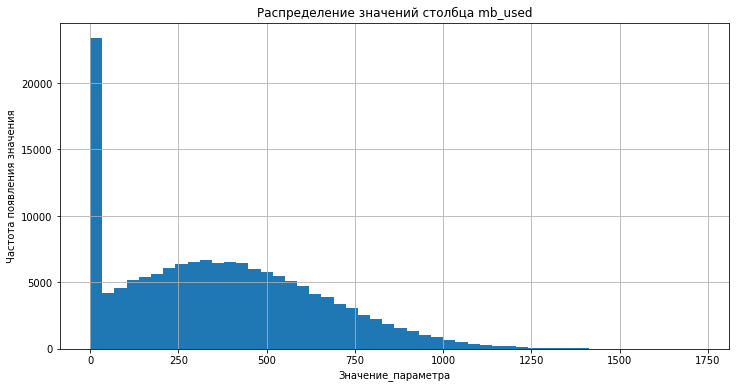

In [ ]:
df_net["mb_used"].hist(bins=50)
plt.title("Распределение значений столбца mb_used")
plt.xlabel("Значение_параметра")
plt.ylabel("Частота появления значения")
plt.show()

Виден большой пик частоты появления значений около нуля в данных по объёму потраченного за сессию интернет-трафика. Посмотрим часто встречаемые значения по этим данным:

In [ ]:
df_net["mb_used"].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

И посмотрим статистические свойства этих данных:

In [ ]:
df_net["mb_used"].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Кажется, все в порядке. Отрицательных значений не обнаружено. Нули скорей всего связаны с нулевыми сессиями клиента.

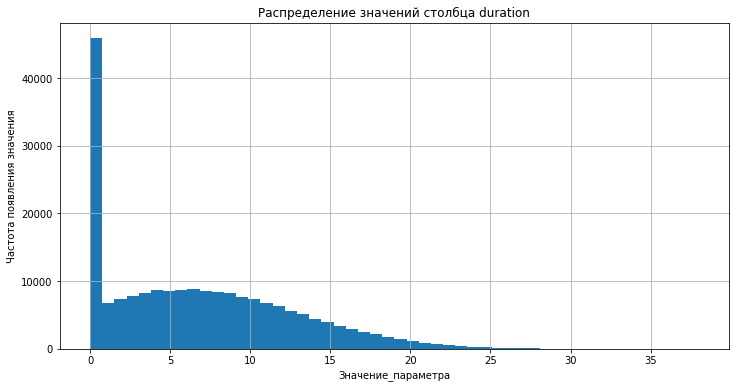

In [ ]:
df_calls["duration"].hist(bins=50)
plt.title("Распределение значений столбца duration")
plt.xlabel("Значение_параметра")
plt.ylabel("Частота появления значения")
plt.show()

На гистограме по данным о продолжительности звонков клиентов виден также пик около нуля. Это звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять. 

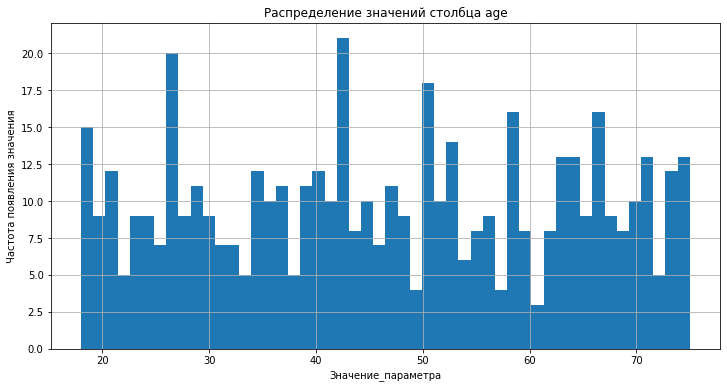

In [ ]:
df_users["age"].hist(bins=50)
plt.title("Распределение значений столбца age")
plt.xlabel("Значение_параметра")
plt.ylabel("Частота появления значения")
plt.show()

Со значениями возраста всё в порядке.

***Вывод***

У нас есть три таблицы, связанные с потребляемыми клиентами услугами.
Есть таблица с персональными данными по клиентам. И одна таблица со стоимостью услуг по тарифам.

Предварительно можно утверждать, что, данных достаточно для проведения исследования. 
Из проблем, обнаружены неподходящие для анализа типы данных. Требуется предобработка перед тем как приступить непосредственно к вычислениям и исследовательскому анализу.

## Предобработка данных

### Проверка явных дубликатов

Проверим, есть ли дубликаты в данных:

In [ ]:
print(df_net.duplicated().sum())
print(df_calls.duplicated().sum())
print(df_sms.duplicated().sum())
print(df_users.duplicated().sum())

0
0
0
0


Явные дубликаты не обнаружены.

### Проверка неявных дубликатов

Проверим, есть ли в таблице информация о том, перешел ли один и тот же человек с одного тарифа на другой, для этого посмотрим, есть ли в таблице повторы ФИО:

In [ ]:
df_users.loc[:, ["last_name", "first_name"]].duplicated().sum()

0

Таких людей не обнаружено.

Из всех столбцов еще один столбец может быть с неявными дубликатами.  Это - `city` из таблицы `df_users` c типом данных object. 

Познакомимся со значениями в столбце :

In [ ]:
df_users["city"].sort_values(ascending=False).value_counts().head(20)

Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Екатеринбург        11
Ульяновск           11
Набережные Челны    11
Краснодар           11
Челябинск            9
Самара               9
Нижний Новгород      8
Пермь                8
Волгоград            8
Улан-Удэ             7
Красноярск           7
Вологда              7
Новокузнецк          7
Киров                6
Name: city, dtype: int64

Посчитаем, сколько уникальных значений в столбце сейчас:

In [ ]:
len(df_users["city"].unique())

76

Чтобы избавиться от неявных дубликатов надо привести все значения к единому виду:

In [ ]:
df_users["city"] = df_users["city"].str.lower()  # делаем все названия пунктов строчными

Теперь отсортируем список уникальных названий населенных пунктов по количеству букв в названии:

In [ ]:
list_of_locality = (
    df_users.copy()
    .assign(Value=lambda x: x["city"].str.len())
    .sort_values("Value", ascending=True)
    .reset_index(drop=True)
    .assign(Rating=df_users.index + 1)
)
list_of_locality = (
    list_of_locality["city"].drop_duplicates().reset_index(drop=True).str.lower()
)

Выведем первую десятку:

In [ ]:
list_of_locality.head(10)

0      уфа
1     омск
2     чита
3     сочи
4     тула
5     орёл
6    киров
7    пенза
8    пермь
9    курск
Name: city, dtype: object

Все получилось. Создадим новый фрейм, где через цикл, будем искать частичное совпадение названия пункта с содержимым списка. При совпадении будем добавлять названия из списка в новый столбец `new_city`:

In [ ]:
df_temp = df_users.copy()  # создаем временный фрейм
for i in list_of_locality:
    df_temp.loc[(df_temp["city"].str.contains(i, regex=False)), "new_city"] = i

Удалим дубликаты из полученного фрейма и запустим цикл, который  создаст список тех значений `locality_name`, которые не совпадают полностью с `new_locality_name`. Таким образом, мы получим список возможных задвоений названий типа "ёлкино" и "поселок ёлкино".

In [ ]:
list_temp = []
df_temp = df_temp[["city", "new_city"]].drop_duplicates().reset_index(drop=True)
for i in list_of_locality:
    for x in range(len(df_temp["city"])):
        if i in df_temp.loc[x, "city"] and df_temp.loc[x, "city"] != i:
            string = (
                str(df_temp.loc[x, "city"]) + "__" + str(i)
            )  # формируем строку с названием населенного пункта и схожим с ним названием другого пункта
            list_temp.append(string)

df_temp = pd.DataFrame(data=list_temp)  # сделаем из списка датафрейм

In [ ]:
df_temp.drop_duplicates().reset_index(drop=True)  # смотрим, что получилось

,0
0,томск__омск


Неявные дубликаты не обнаружены.

### Изменение типа данных

[Как мы поняли ранее](#datetime), чтобы можно было провести дальнейший исследовательский анализ, надо поменять тип данных в столбцах, которые содержат временные данные.

In [ ]:
df_calls["date"] = pd.to_datetime(df_calls["call_date"], format="%Y.%m.%d")  # меняем
df_calls["date"].head()  # смотрим результат

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: date, dtype: datetime64[ns]

In [ ]:
df_net["date"] = pd.to_datetime(df_net["session_date"], format="%Y.%m.%d")  # меняем
df_net["date"].head()  # смотрим результат

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: date, dtype: datetime64[ns]

In [ ]:
df_sms["date"] = pd.to_datetime(df_sms["message_date"], format="%Y.%m.%d")  # меняем
df_sms["date"].head()  # смотрим результат

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: date, dtype: datetime64[ns]

In [ ]:
df_users["churn_date"] = pd.to_datetime(
    df_users["churn_date"], format="%Y.%m.%d"
)  # меняем
df_users["churn_date"].head()  # смотрим результат

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: churn_date, dtype: datetime64[ns]

In [ ]:
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"], format="%Y.%m.%d")  # меняем
df_users["reg_date"].head()  # смотрим результат

0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]

После того, как мы поменяли тип данных с датой, надо проанализировать эти столбцы:

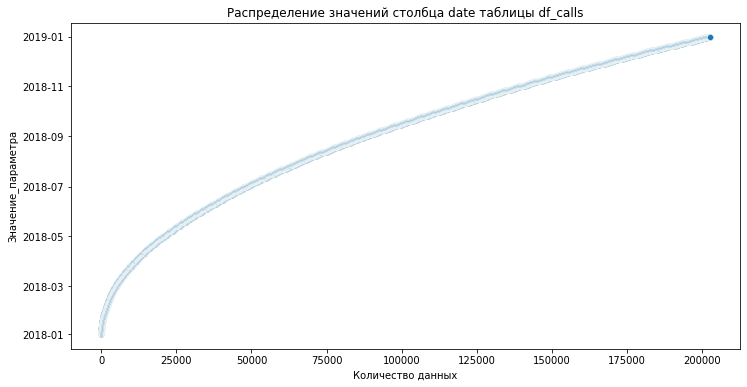

In [ ]:
sns.scatterplot(x=range(len(df_calls["date"])), y=df_calls["date"].sort_values())
plt.xlabel("Количество данных")
plt.title("Распределение значений столбца date таблицы df_calls")
plt.ylabel("Значение_параметра")
plt.show()

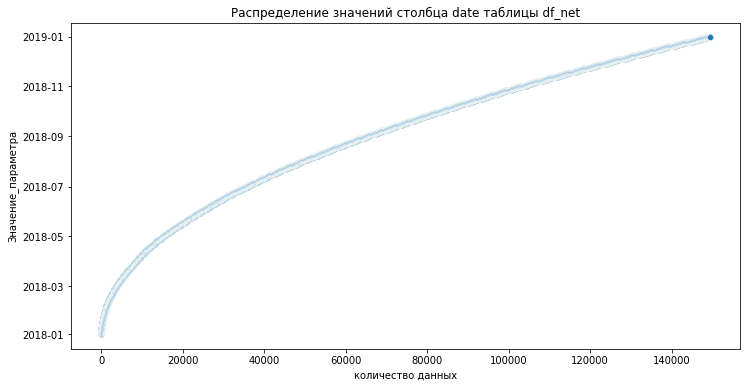

In [ ]:
sns.scatterplot(x=range(len(df_net["date"])), y=df_net["date"].sort_values())
plt.xlabel("количество данных")
plt.title("Распределение значений столбца date таблицы df_net")
plt.ylabel("Значение_параметра")
plt.show()

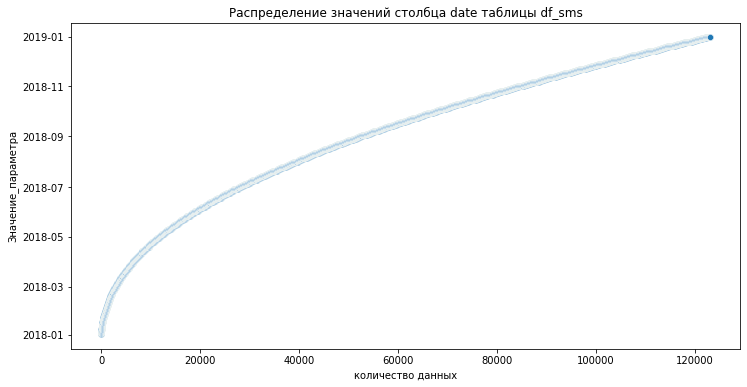

In [ ]:
sns.scatterplot(x=range(len(df_sms["date"])), y=df_sms["date"].sort_values())
plt.xlabel("количество данных")
plt.title("Распределение значений столбца date таблицы df_sms")
plt.ylabel("Значение_параметра")
plt.show()

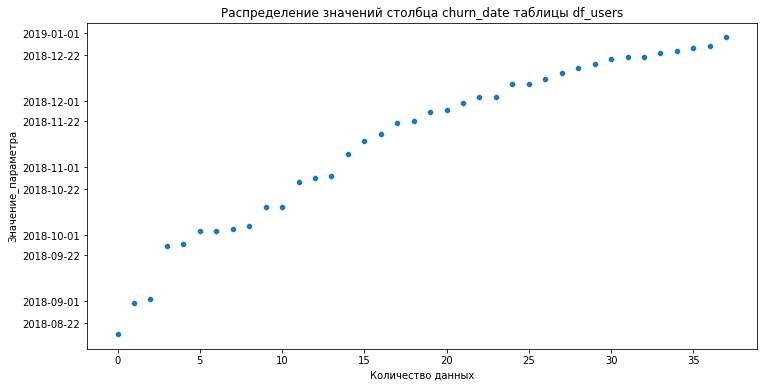

In [ ]:
sns.scatterplot(
    x=range(len(df_users["churn_date"])), y=df_users["churn_date"].sort_values()
)
plt.xlabel("Количество данных")
plt.title("Распределение значений столбца churn_date таблицы df_users")
plt.ylabel("Значение_параметра")
plt.show()

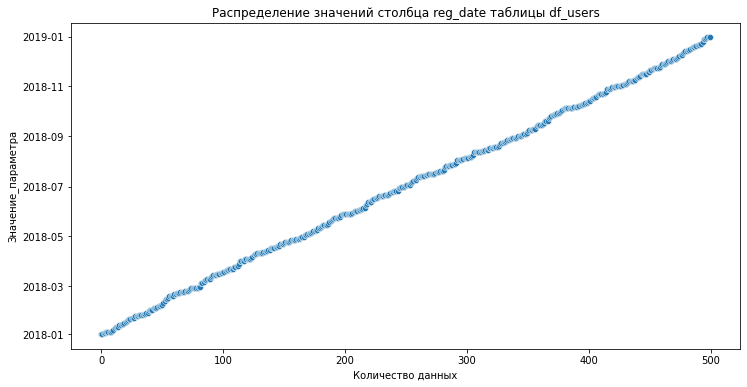

In [ ]:
sns.scatterplot(
    x=range(len(df_users["reg_date"])), y=df_users["reg_date"].sort_values()
)
plt.xlabel("Количество данных")
plt.title("Распределение значений столбца reg_date таблицы df_users")
plt.ylabel("Значение_параметра")
plt.show()

Визуально аномалии не обнаружены.

### Подготовка данных к анализу

Так как «Мегалайн» всегда округляет секунды до минут, нужно округлить в большую сторону данные по звонкам:

In [ ]:
df_calls["raw_duration"] = df_calls[
    "duration"
]  # сохраним не обработанные данные на всякий случай
df_calls.loc[df_calls["duration"] > 0, "duration"] = df_calls.loc[
    df_calls["duration"] > 0, "duration"
].apply(np.ceil)

In [ ]:
df_calls["duration"] = df_calls["duration"].astype(
    int
)  # переведем в целочисленный формат для удобства
df_calls.head()

,id,call_date,duration,user_id,date,raw_duration
0,1000_0,2018-07-25,0,1000,2018-07-25,0.00
1,1000_1,2018-08-17,0,1000,2018-08-17,0.00
2,1000_2,2018-06-11,3,1000,2018-06-11,2.85
3,1000_3,2018-09-21,14,1000,2018-09-21,13.80
4,1000_4,2018-12-15,6,1000,2018-12-15,5.18


В таблице df_net есть один лишний дублирующий столбец `Unnamed: 0`. Удалим лишний столбец:

In [ ]:
df_net = df_net.drop(["Unnamed: 0"], axis=1)
df_net.head()

,id,mb_used,session_date,user_id,date
0,1000_0,112.95,2018-11-25,1000,2018-11-25
1,1000_1,1052.81,2018-09-07,1000,2018-09-07
2,1000_2,1197.26,2018-06-25,1000,2018-06-25
3,1000_3,550.27,2018-08-22,1000,2018-08-22
4,1000_4,302.56,2018-09-24,1000,2018-09-24


Поменяем название столбца `tariff_name` в таблице `df_tarif` для удобства работы :

In [ ]:
df_tarif = df_tarif.rename(columns={"tariff_name": "tariff"})
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Вывод**

На этапе предобработки мы изменили тип данных в нескольких столбцах. Для удобства работы удалили лишние данные, переименовали столбцы.


## Расчеты

Прежде всего выясним, сколько всего клиентов одного тарифа, а сколько - другого:


In [ ]:
print(
    "Количество клиентов тарифа smart :",
    df_users[df_users["tariff"] == "smart"]["tariff"].count(),
)
print(
    "Количество клиентов тарифа ultra :",
    df_users[df_users["tariff"] == "ultra"]["tariff"].count(),
)

Количество клиентов тарифа smart : 351
Количество клиентов тарифа ultra : 149


Количество клиентов тарифа «Смарт» превышает количество клиентов тарифа «Ультра» в :

In [ ]:
print(
    "{:.2f}".format(
        df_users[df_users["tariff"] == "smart"]["tariff"].count()
        / df_users[df_users["tariff"] == "ultra"]["tariff"].count()
    )
)

2.36


Посчитаем для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам. Для  этого создадим столбцы месяцев, когда была использована та или иная услуга:

In [ ]:
df_calls["month"] = pd.DatetimeIndex(df_calls["date"]).month
df_sms["month"] = pd.DatetimeIndex(df_sms["date"]).month
df_net["month"] = pd.DatetimeIndex(df_net["date"]).month
df_users["month_begin"] = pd.DatetimeIndex(df_users["reg_date"]).month
df_users["month_end"] = pd.DatetimeIndex(df_users["churn_date"]).month
df_users["month_end"] = df_users["month_end"].fillna(
    12
)  # заполним пропуски значением 12 - последним месяцем в нашей базе данных.

А также добавим столбец, который будет показывать, сколько клиент пользовался услугами оператора:

In [ ]:
df_users["month_active"] = df_users["month_end"] - df_users["month_begin"] + 1
df_users["month_active"] = df_users["month_active"].astype(int)

Посчитаем для каждого пользователя количество звонков и израсходованных минут разговора по месяцам :

In [ ]:
df_all = df_calls[df_calls['duration']>0].groupby(['user_id','month'])['duration'].agg(['count','sum'])
df_all.columns = ['count_calls','sum_calls'] # переименуем столбцы
df_all.tail()

count_calls  sum_calls
user_id month                        
1498    10              30        247
1499    9                8         70
        10              44        449
        11              62        612
        12              56        492

Создадим еще столбец с сырыми данными по длительности разговоров:

In [ ]:
x = df_calls[df_calls['raw_duration']>0].groupby(['user_id','month'])['raw_duration'].agg(['sum'])
df_all['raw_calls'] = x['sum']
df_all.tail()

count_calls  sum_calls  raw_calls
user_id month                                   
1498    10              30        247     232.63
1499    9                8         70      64.65
        10              44        449     429.91
        11              62        612     576.50
        12              56        492     465.16

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам: 

In [ ]:
x = df_sms.groupby(['user_id','month'])['id'].agg(['count'])
x.columns = ['count_sms']
x.tail()

count_sms
user_id month           
1498    10            42
1499    9             11
        10            48
        11            59
        12            66

Соединим в одну таблицу:

In [ ]:
df_all = df_all.join(x, how='outer') 
df_all.tail()

count_calls  sum_calls  raw_calls  count_sms
user_id month                                              
1498    10            30.0      247.0     232.63       42.0
1499    9              8.0       70.0      64.65       11.0
        10            44.0      449.0     429.91       48.0
        11            62.0      612.0     576.50       59.0
        12            56.0      492.0     465.16       66.0

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам: 

In [ ]:
x = df_net.groupby(['user_id','month'])['mb_used'].agg(['sum'])
x.columns = ['used_net']
x.tail()

used_net
user_id month          
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

Соединим в одну таблицу:

In [ ]:
df_all = df_all.join(x, how='outer')
df_all.tail()

count_calls  sum_calls  raw_calls  count_sms  used_net
user_id month                                                        
1498    10            30.0      247.0     232.63       42.0  20579.36
1499    9              8.0       70.0      64.65       11.0   1845.75
        10            44.0      449.0     429.91       48.0  17788.51
        11            62.0      612.0     576.50       59.0  17963.31
        12            56.0      492.0     465.16       66.0  13055.58

Теперь сделаем таблицу, которая  имеет понимание в каком месяце платил клиент за абонентскую плату на случай, если клиент подключился к тарифу не не звонил, не писал сообщения, не пользовался интернетом:


In [ ]:
x = pd.DataFrame( index=[], columns=['user_id','value','month'])  # создаем таблицу где будет информация о том что клиент пользовался в данном месяце услугами оператора
df_abonent_fee = df_users  # создаем таблицу, откуда будем брать информацию
df_abonent_fee = df_abonent_fee.merge(
    df_tarif, on="tariff", how="left"
)  # добавим информацию о тарифе
count=0 # это будет счетчик строк в новой таблице
for i in range(len(df_abonent_fee)):
    for m in range(1, 13):
        if (m >= df_abonent_fee.loc[i, "month_begin"]
            and m <= df_abonent_fee.loc[i, "month_end"]        ):  # проходим циклом по всем значениям таблицы, заполняем ячейку значением True, если пользователь ипользовал в этом месяце услугами оператора
            x.loc[count,'value'] = True # df_abonent_fee.loc[i, "rub_monthly_fee"]
            x.loc[count,'user_id'] = df_abonent_fee.loc[i, "user_id"]
            x.loc[count,'month'] = m
            count+=1

In [ ]:
x.head(10)

,user_id,value,month
0,1000,True,5
1,1000,True,6
2,1000,True,7
3,1000,True,8
4,1000,True,9
5,1000,True,10
6,1000,True,11
7,1000,True,12
8,1001,True,11
9,1001,True,12


Вышло!

Группируем данные, чтобы потом соединить их c основной таблицей df_all:


In [ ]:
x = x.groupby(['user_id','month'])['value'].agg(['sum'])
x.columns = ['abonent_cost']
x

abonent_cost
user_id month             
1000    5             True
        6             True
        7             True
        8             True
        9             True
...                    ...
1498    10            True
1499    9             True
        10            True
        11            True
        12            True

[3216 rows x 1 columns]

Соединим с основной таблицей:

In [ ]:
df_all = df_all.join(x, how='outer')
df_all

count_calls  sum_calls  raw_calls  count_sms  used_net  \
user_id month                                                           
1000    5             17.0      159.0     150.06       22.0   2253.49   
        6             28.0      172.0     158.90       60.0  23233.77   
        7             41.0      340.0     318.80       75.0  14003.64   
        8             42.0      408.0     389.87       81.0  14055.93   
        9             46.0      466.0     440.14       57.0  14568.91   
...                    ...        ...        ...        ...       ...   
1498    10            30.0      247.0     232.63       42.0  20579.36   
1499    9              8.0       70.0      64.65       11.0   1845.75   
        10            44.0      449.0     429.91       48.0  17788.51   
        11            62.0      612.0     576.50       59.0  17963.31   
        12            56.0      492.0     465.16       66.0  13055.58   

              abonent_cost  
user_id month               
1000    5             True  
        6             True  
        7             True  
        8             True  
        9             True  
...                    ...  
1498    10            True  
1499    9             True  
        10            True  
        11            True  
        12            True  

[3216 rows x 6 columns]

Количество строк таблицы не изменилось. Значит, все клиенты за весь срок подключения к тарифу в каждом месяце пользовались хотя бы одной услугой оператора.

Объединим таблицу расхода траффика по месяцам с таблицей, которая знает тариф клиента и с таблицей, определяющей стоимость услуг по определенному тарифу:

In [ ]:
df_all = df_all.reset_index() # переведем мультииндексы в столбцы таблицы
df_all = df_all.merge(df_users, on="user_id", how="left")
df_all = df_all.merge(df_tarif, on="tariff", how="left")
df_all.head()

,user_id,month,count_calls,sum_calls,raw_calls,count_sms,used_net,abonent_cost,age,churn_date,city,first_name,last_name,reg_date,tariff,month_begin,month_end,month_active,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,150.06,22.0,2253.49,True,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,158.90,60.0,23233.77,True,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,318.80,75.0,14003.64,True,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,389.87,81.0,14055.93,True,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,440.14,57.0,14568.91,True,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1


Вычтем бесплатный лимит звонков  по тарифу из суммарного количества звонков:

In [ ]:
df_all.loc[:, "earn_calls"] = df_all.loc[:, "sum_calls"] - df_all.loc[:,"minutes_included"]
df_all[['user_id','earn_calls']].tail()

,user_id,earn_calls
3211,1498,-253.0
3212,1499,-430.0
3213,1499,-51.0
3214,1499,112.0
3215,1499,-8.0


Умножим остаток минут на стоимость минут по тарифу:

In [ ]:
df_all.loc[:, "earn_calls"] = df_all.loc[:, "earn_calls"] * df_all.loc[:,"rub_per_minute"]
df_all.loc[:, "earn_calls"] = df_all[ df_all.loc[:, "earn_calls"].gt(0)]  # фильтруем положительные значения
df_all[['user_id','earn_calls']].tail() # выводим

,user_id,earn_calls
3211,1498,NaN
3212,1499,NaN
3213,1499,NaN
3214,1499,336.0
3215,1499,NaN


Вычтем бесплатный лимит сообщений  по тарифу из суммарного количества сообщений по месяцам:

In [ ]:
df_all.loc[:, "earn_sms"] = df_all.loc[:, "count_sms"] - df_all.loc[:,"messages_included"]
df_all[['user_id','earn_sms']].tail()

,user_id,earn_sms
3211,1498,-8.0
3212,1499,-39.0
3213,1499,-2.0
3214,1499,9.0
3215,1499,16.0


Умножим остаток на стоимость за сообщение:

In [ ]:
df_all.loc[:, "earn_sms"] = df_all.loc[:, "earn_sms"] * df_all.loc[:,"rub_per_message"]
df_all.loc[:, "earn_sms"] = df_all[ df_all.loc[:, "earn_sms"].gt(0)]  # фильтруем положительные значения
df_all[['user_id','earn_sms']].tail()

,user_id,earn_sms
3211,1498,NaN
3212,1499,NaN
3213,1499,NaN
3214,1499,27.0
3215,1499,48.0


Вычтем бесплатный лимит траффика по тарифу из суммарного количества траффика:

In [ ]:
df_all.loc[:, "earn_net"] = df_all.loc[:, "used_net"] - df_all.loc[:,"mb_per_month_included"] # вычитаем
df_all[['user_id','earn_net']].tail()

,user_id,earn_net
3211,1498,5219.36
3212,1499,-13514.25
3213,1499,2428.51
3214,1499,2603.31
3215,1499,-2304.42


Округлим траффик клиентов в большую сторону до гигабайт согласно политике Мегалайна:

In [ ]:
df_all.loc[:, "earn_net"] = df_all[
    df_all.loc[:, "earn_net"].gt(0)
]  # убираем отрицательные значения
df_all.loc[:, "earn_net"] = (df_all.loc[:, "earn_net"] / 1024).apply(    np.ceil)
df_all[['user_id','earn_net']].tail()

,user_id,earn_net
3211,1498,6.0
3212,1499,NaN
3213,1499,3.0
3214,1499,3.0
3215,1499,NaN


Умножим остаток на цену за гигабайт по тарифу:

In [ ]:
df_all.loc[:, "earn_net"] = df_all.loc[:, "earn_net"] * df_all.loc[:,"rub_per_gb"]
df_all[['user_id','earn_net']].tail() # выводим

,user_id,earn_net
3211,1498,1200.0
3212,1499,NaN
3213,1499,600.0
3214,1499,600.0
3215,1499,NaN


Просчитаем, сколько каждый клиент заплатил за абонентскую плату:

In [ ]:
df_all['abonent_cost'] = df_all['abonent_cost'] * df_all['rub_monthly_fee'] 
df_all[['user_id','abonent_cost']].tail() # выводим

,user_id,abonent_cost
3211,1498,550
3212,1499,550
3213,1499,550
3214,1499,550
3215,1499,550


Прежде чем получить общую выручку за месяц по клиентам посмотрим на информацию о таблице:

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3216 non-null   int64         
 2   count_calls            3168 non-null   float64       
 3   sum_calls              3168 non-null   float64       
 4   raw_calls              3168 non-null   float64       
 5   count_sms              2717 non-null   float64       
 6   used_net               3203 non-null   float64       
 7   abonent_cost           3216 non-null   object        
 8   age                    3216 non-null   int64         
 9   churn_date             189 non-null    datetime64[ns]
 10  city                   3216 non-null   object        
 11  first_name             3216 non-null   object        
 12  last_name              3216 non-null   object        
 13  reg

Мы  видим пропуски во многих столбцах. Раз есть пропуски в потреблении каких-то услуг в каком-то из месяцев, значит клиент не использовал эту услугу, но продолжал оставаться клиентом оператора. Заполним пропуски в таблице нулями, кроме столбца `churn_date`. Это повлияет на средние значения при вычислениях, но не учесть месяцы без потребления услуг, думаю, бы ло бы неправильным.Кроме того, заполнение нулями в выручке определнных услуг необходимо для корректного расчета общей выручки.

In [ ]:
df_all.loc[:, df_all.columns!='churn_date'] = df_all.loc[:, df_all.columns!='churn_date'].fillna(0)
df_all.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3216 non-null   int64         
 2   count_calls            3216 non-null   float64       
 3   sum_calls              3216 non-null   float64       
 4   raw_calls              3216 non-null   float64       
 5   count_sms              3216 non-null   float64       
 6   used_net               3216 non-null   float64       
 7   abonent_cost           3216 non-null   int64         
 8   age                    3216 non-null   int64         
 9   churn_date             189 non-null    datetime64[ns]
 10  city                   3216 non-null   object        
 11  first_name             3216 non-null   object        
 12  last_name              3216 non-null   object        
 13  reg

Создадим столбец с суммой выручки за год для каждого клиента:

In [ ]:
df_all['monthly_income'] = df_all['abonent_cost']+df_all['earn_calls']+df_all['earn_net']+df_all['earn_sms']  
df_all[['user_id','monthly_income']].tail() # выводим

,user_id,monthly_income
3211,1498,1750.0
3212,1499,550.0
3213,1499,1150.0
3214,1499,1513.0
3215,1499,598.0


## Исследовательский анализ данных

### Изучение поведения клиентов

Чтобы понять поведение клиентов, надо узнать, сколько они потребляют услуг на каждом тарифе.

Посмотрим, в среднем, сколько минут разговора требуется пользователю в месяц.

Посчитаем среднее количество, дисперсию и стандартное отклонение средней месячной суммы продолжительности звонков для каждого тарифа:

In [ ]:
a = df_all.loc[df_all["tariff"] == "smart", "raw_calls"]
b = df_all.loc[df_all["tariff"] == "ultra", "raw_calls"]

print("Дисперсия для тарифа smart равна :", round(np.var(a, ddof=1),2))
print("Дисперсия для тарифа ultra равна :", round(np.var(b, ddof=1),2))
print("Среднее количество для тарифа smart равно :", round(a.mean(),2))
print("Среднее количество для тарифа ultra равно :", round(b.mean(),2))
print("Медиана для тарифа smart равна :", round(a.median(),2))
print("Медиана для тарифа ultra равна :", round(b.median(),2))
print("Среднее отклонение для тарифа smart равно :", round(np.std(a, ddof=1),2))
print("Среднее отклонение для тарифа ultra равно :", round(np.std(b, ddof=1),2))

Дисперсия для тарифа smart равна : 32441.63
Дисперсия для тарифа ultra равна : 90101.77
Среднее количество для тарифа smart равно : 394.25
Среднее количество для тарифа ultra равно : 496.56
Медиана для тарифа smart равна : 397.88
Медиана для тарифа ultra равна : 488.1
Среднее отклонение для тарифа smart равно : 180.12
Среднее отклонение для тарифа ultra равно : 300.17


Построим гистограммы распределений значений для средней месячной суммы продолжительности звонков для каждого тарифа:

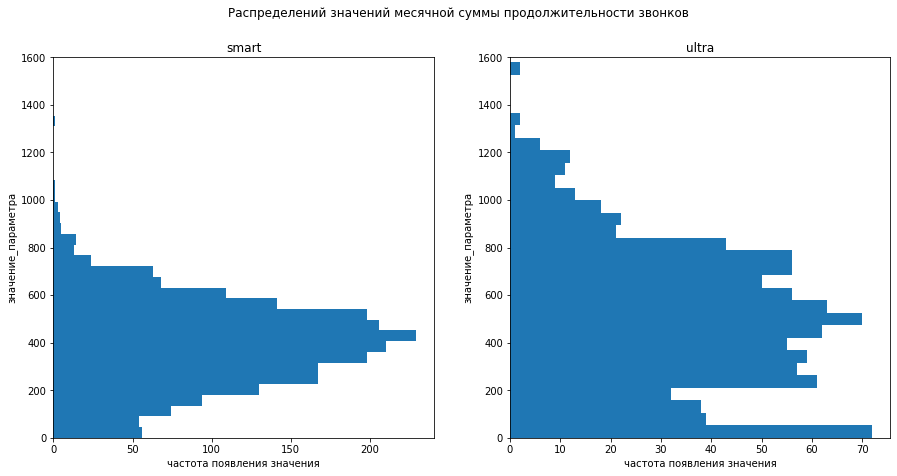

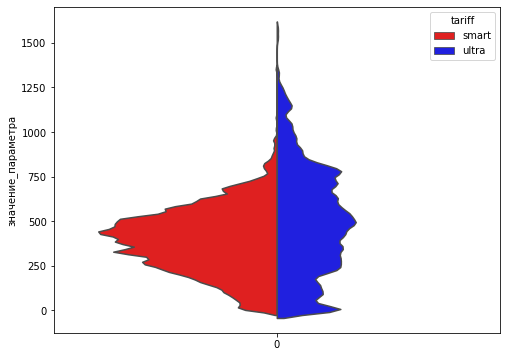

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle(
    "Распределений значений месячной суммы продолжительности звонков"
)
ax1.set_ylim([0, 1600])
ax2.set_ylim([0, 1600])
ax1.set_title("smart")
ax2.set_title("ultra")
ax1.set_xlabel("частота появления значения")
ax1.set_ylabel("значение_параметра")
ax2.set_xlabel("частота появления значения")
ax2.set_ylabel("значение_параметра")

y = df_all.loc[df_all["tariff"] == "smart", "raw_calls"]
ax1.hist(y, orientation="horizontal", bins=30)
y = df_all.loc[df_all["tariff"] == "ultra", "raw_calls"]
ax2.hist(y, orientation="horizontal", bins=30)
plt.show()
df_all["dummy"] = 0
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.violinplot(
    x="dummy",
    y="raw_calls",
    hue="tariff",
    data=df_all.sort_values(by="tariff"),
    palette=[color1, color2],
    split=True,
    scale="count",
    inner=None,
    bw=0.07,
)
ax.set_xlabel("")
ax.set_ylabel("значение_параметра")
plt.show()

У тарифа «Ультра» заметен больший разброс в значениях средней месячной суммы продолжительности звонов. Оба распределения выглядят нормальными.

Клиент тарифа «Ультра» в среднем на 25 % (496/394) больше общается по телефону нежели клиент тарифа «Смарт».

Посмотрим, в среднем, сколько сообщений требуется каждому клиенту в месяц.

Посчитаем среднее, дисперсию и стандартное отклонение для среднего месячного количества сообщений отправленных клиентом :

In [ ]:
a = df_all.loc[df_all["tariff"] == "smart", "count_sms"]
b = df_all.loc[df_all["tariff"] == "ultra", "count_sms"]

print("Дисперсия для тарифа smart равна :", round(np.var(a, ddof=1),2))
print("Дисперсия для тарифа ultra равна :", round(np.var(b, ddof=1),2))
print("Среднее количество для тарифа smart равно :", round(a.mean(),2))
print("Среднее количество для тарифа ultra равно :", round(b.mean(),2))
print("Медиана для тарифа smart равна :", round(a.median(),2))
print("Медиана для тарифа ultra равна :", round(b.median(),2))
print("Среднее отклонение для тарифа smart равно :", round(np.std(a, ddof=1),2))
print("Среднее отклонение для тарифа ultra равно :", round(np.std(b, ddof=1),2))

Дисперсия для тарифа smart равна : 796.96
Дисперсия для тарифа ultra равна : 2285.42
Среднее количество для тарифа smart равно : 33.37
Среднее количество для тарифа ultra равно : 49.31
Медиана для тарифа smart равна : 28.0
Медиана для тарифа ultra равна : 38.0
Среднее отклонение для тарифа smart равно : 28.23
Среднее отклонение для тарифа ultra равно : 47.81


Построим гистограммы распределений значений для среднего месячного количества сообщений отправленных клиентом :

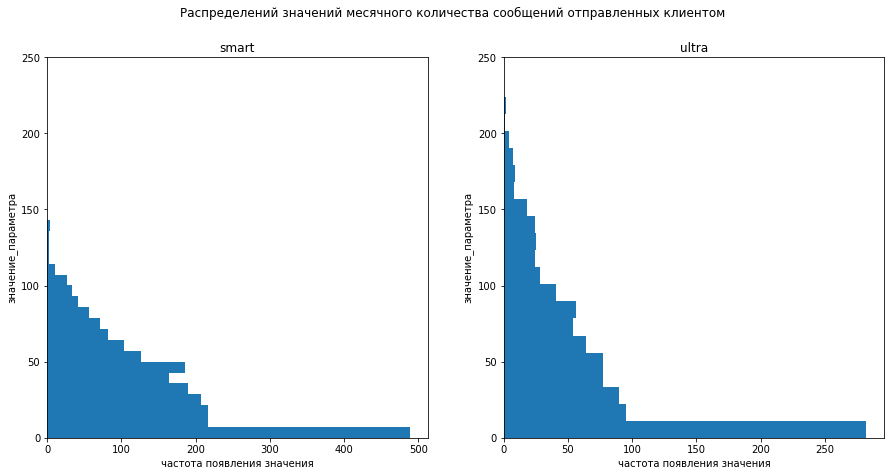

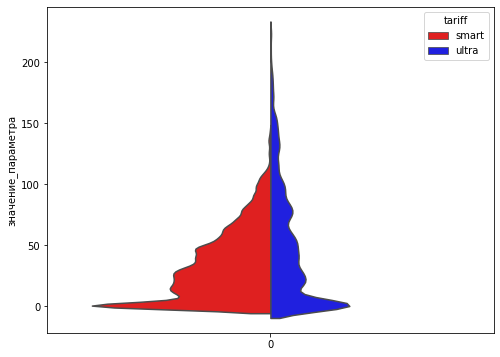

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle(
    "Распределений значений месячного количества сообщений отправленных клиентом"
)
ax1.set_ylim([0, 250])
ax2.set_ylim([0, 250])
ax1.set_title("smart")
ax2.set_title("ultra")
ax1.set_xlabel("частота появления значения")
ax1.set_ylabel("значение_параметра")
ax2.set_xlabel("частота появления значения")
ax2.set_ylabel("значение_параметра")

y = df_all.loc[df_all["tariff"] == "smart", "count_sms"]
ax1.hist(y, orientation="horizontal", bins=20)
y = df_all.loc[df_all["tariff"] == "ultra", "count_sms"]
ax2.hist(y, orientation="horizontal", bins=20)
plt.show()
x["dummy"] = 0
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.violinplot(
    x="dummy",
    y="count_sms",
    hue="tariff",
    data=df_all.sort_values(by="tariff"),
    palette=[color1, color2],
    split=True,
    scale="count",
    inner=None,
    bw=0.1,
)
ax.set_xlabel("")
ax.set_ylabel("значение_параметра")
plt.show()

На тарифе «Смарт» клиентам в среднем требуется отправлять 33 сообщений, для тарифа «Ультра» - почти в 1.5 раза больше(49).
В целом, заметно, что обмен сообщениями - не популярная услуга, так как есть много месяцев, когда в обоих тарифах смс не пользуются вообще. Вполне понятно, так как отослать сообщение через интернет-мессенджер намного дешевле и удобней.

Посмотрим, в среднем, сколько интернет траффика требуется пользователю в месяц:

Посчитаем среднее количество, дисперсию и стандартное отклонение для средней месячной суммы израсходованного интернет траффика каждым клиентом для каждого тарифа :

In [ ]:
a = df_all.loc[df_all["tariff"] == "smart", "used_net"]
b = df_all.loc[df_all["tariff"] == "ultra", "used_net"]

print("Дисперсия для тарифа smart равна :", round(np.var(a, ddof=1),2))
print("Дисперсия для тарифа ultra равна :", round(np.var(b, ddof=1),2))
print("Среднее количество для тарифа smart равно :", round(a.mean(),2))
print("Среднее количество для тарифа ultra равно :", round(b.mean(),2))
print("Медиана для тарифа smart равна :", round(a.median(),2))
print("Медиана для тарифа ultra равна :", round(b.median(),2))
print("Среднее отклонение для тарифа smart равно :", round(np.std(a, ddof=1),2))
print("Среднее отклонение для тарифа ultra равно :", round(np.std(b, ddof=1),2))

Дисперсия для тарифа smart равна : 34564843.48
Дисперсия для тарифа ultra равна : 102032129.46
Среднее количество для тарифа smart равно : 16201.12
Среднее количество для тарифа ultra равно : 19449.06
Медиана для тарифа smart равна : 16505.47
Медиана для тарифа ultra равна : 19304.02
Среднее отклонение для тарифа smart равно : 5879.19
Среднее отклонение для тарифа ultra равно : 10101.1


Построим гистограммы распределений значений для средней месячной суммы израсходованного интернет траффика каждым клиентом для каждого тарифа :

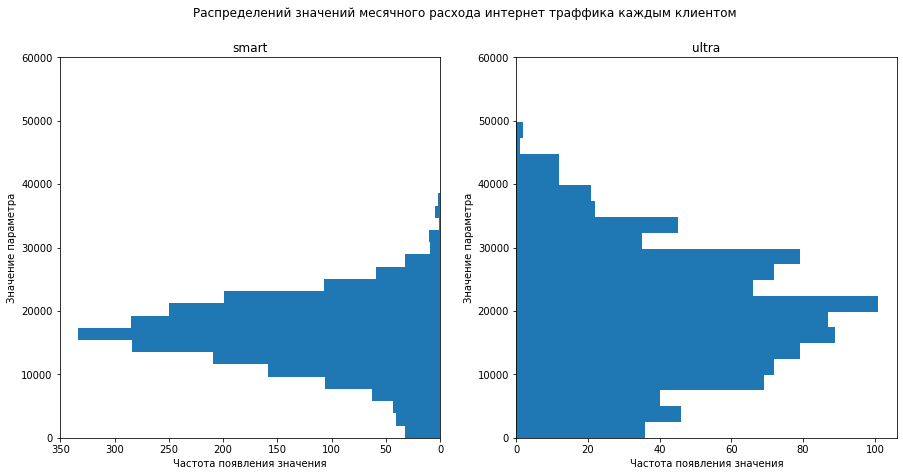

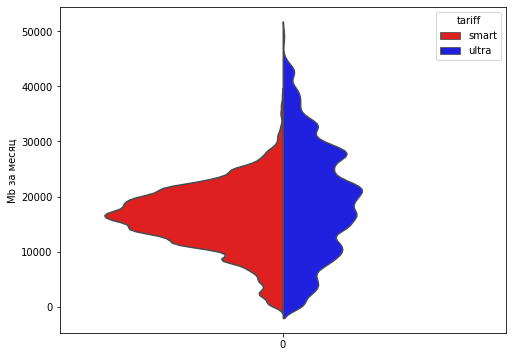

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle(
    "Распределений значений месячного расхода интернет траффика каждым клиентом"
)
ax1.set_ylabel("Mb за месяц")
ax2.set_ylabel("Mb за месяц")
ax1.set_ylim([0, 60000])
ax2.set_ylim([0, 60000])
ax1.set_xlabel("Частота появления значения")
ax1.set_ylabel("Значение параметра")
ax2.set_xlabel("Частота появления значения")
ax2.set_ylabel("Значение параметра")
ax1.set_title("smart")
ax2.set_title("ultra")
y = df_all.loc[df_all["tariff"] == "smart", "used_net"]
ax1.invert_xaxis()
ax1.hist(y, orientation="horizontal", bins=20)
y = df_all.loc[df_all["tariff"] == "ultra", "used_net"]
ax2.hist(y, orientation="horizontal", bins=20)
plt.show()
x["dummy"] = 0
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.violinplot(
    x="dummy",
    y="used_net",
    hue="tariff",
    data=df_all.sort_values(by="tariff"),
    palette=[color1, color2],
    split=True,
    scale="count",
    inner=None,
    bw=0.1,
)
ax.set_xlabel("")
ax.set_ylabel("Mb за месяц")
plt.show()

Медианы среднемесячного расхода интернет траффика каждым клиентом по тарифам близки к друг к другу. Но, опять же, у тарифа «Ультра» заметен очень сильный разброс в значениях. Оба распределения выглядят нормальными.

На тарифе «Смарт» клиентам в среднем нужно 16.2GB, для тарифа «Ультра» - на 20% больше.

### Изучение популярности и прибыльности тарифов

Когда стоит задача узнать предпочтительность чего-то, то надо понять, по каким факторам определять, что что-то лучше. 
На ум приходят 2 фактора : популярность тарифов и их прибыльность.
И конечно же, надо смотреть динамику этих показателей, так как со временем всё может измениться.

Для начала посмотрим, какую среднюю выручку с клиента производит каждый тариф:

In [ ]:
x = df_all.pivot_table(index='tariff', columns='month', values='monthly_income', aggfunc='mean')
x

month,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,721.323529,827.603448,1164.623377,963.089286,1197.510638,1204.018293,1223.950249,1320.595745,1249.946154,1364.853741,1343.047468,1575.488166
ultra,1950.000000,1975.000000,2014.864865,2001.818182,2059.701493,2039.285714,2118.131868,2083.177570,2024.347826,2065.853659,2092.164179,2137.500000


Посмотрим, как менялась средняя выручка в динамике, построив график:

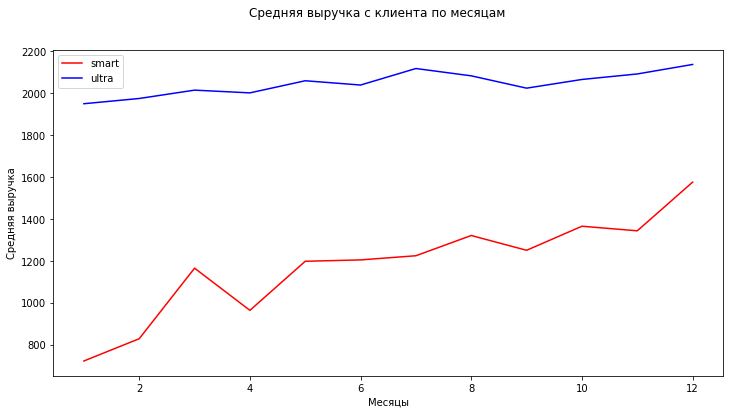

In [ ]:
x.loc["smart"].plot(color=color1)
x.loc["ultra"].plot(color=color2)
plt.xlabel("Месяцы")
plt.ylabel("Cредняя выручка")
plt.suptitle("Средняя выручка с клиента по месяцам")
plt.legend()
plt.show()

Заметно, что хоть с клиента «Ультры» оператор получает в среднем больше выручки, средняя выручка с клиента «Смарта» растет более опережающими темпами и приближается к средней выручке «Ультры», что, возможно, объясняется тем, что к «Смарту» подключаются более платежеспособные клиенты.

Можно посмотреть как меняется соотношение средней выручки на клиента к сумме средних выручек по обоим тарифам на клиента в относительных величинах. Построим график:

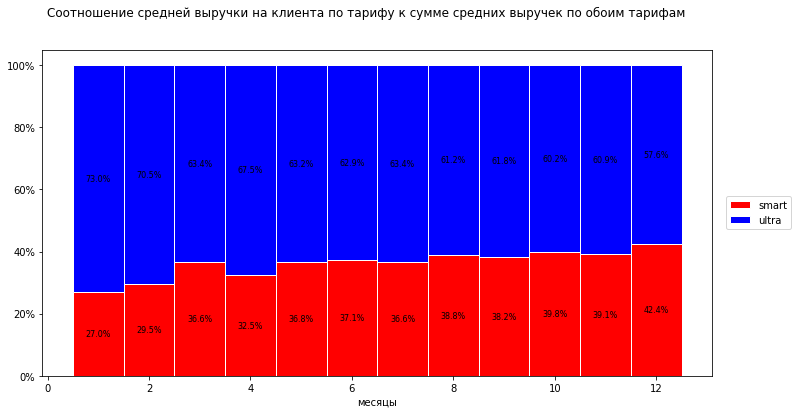

In [ ]:
barWidth = 1
fig, ax = plt.subplots()
bars1 = (x.loc["smart", :] / (x.loc["smart", :] + x.loc["ultra", :]))
bars2 = (x.loc["ultra", :] / (x.loc["smart", :] + x.loc["ultra", :]))
bars = np.add(bars1, bars2).tolist()
plt.bar(
    x.columns, bars1, color=color1, edgecolor="white", width=barWidth, label="smart"
)
plt.bar(
    x.columns,
    bars2,
    bottom=bars1,
    color=color2,
    edgecolor="white",
    width=barWidth,
    label="ultra",
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.legend(loc="center", bbox_to_anchor=(1.07, 0.5))
ax.set_xlabel("месяцы")
plt.suptitle(
    "Соотношение средней выручки на клиента по тарифу к сумме средних выручек по обоим тарифам"
)
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    X = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height*100:.1f}%'

    label_x = X + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
plt.show()


Здесь более заметно, как средняя выручка по клиенту тарифа «Смарт» приближается к равенству выручки тарифа «Ультра».

Сравним, как разнятся распределение выручек клиентов двух тарифов в 2018 году с помощью графика: <a id='vyr_disp'></a>    

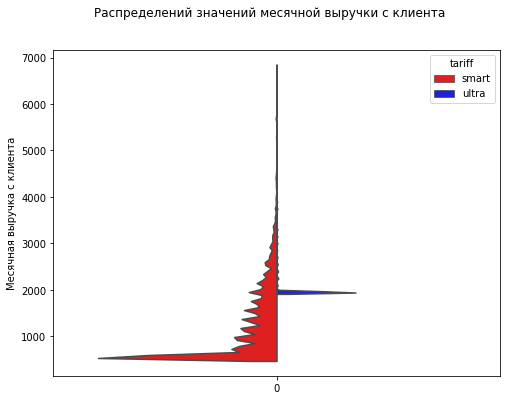

In [ ]:
x["dummy"] = 0
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Распределений значений месячной выручки с клиента")
ax = sns.violinplot(
    x="dummy",
    y="monthly_income",
    hue="tariff",
    data=df_all.sort_values(by="tariff"),
    palette=[color1, color2],
    split=True,
    scale="count",
    inner=None,
    bw=0.05,
)
ax.set_xlabel("")
plt.ylabel("Месячная выручка с клиента")
plt.show()

По графику хорошо заметно, что распределение значений выручки сильно разнится. Поэтому дисперсии тоже будут отличаться. Для тарифа «Ультра» заметен основной пик на на уровне 1950. Это показывает, что клиенты на этом тарифе, в основном, платят только за абонентскую плату.

Теперь посмотрим, в общей массе, какой тариф приносит больше выручки, не учитывая издержки:

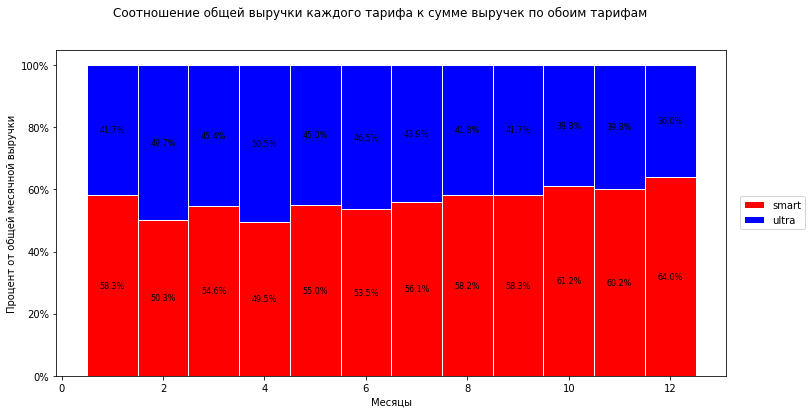

In [ ]:
x = df_all.pivot_table(index='tariff', columns='month', values='monthly_income', aggfunc='sum') # суммируем все месячные выручки

barWidth = 1
fig, ax = plt.subplots()
bars1 = (x.loc["smart", :] / (x.loc["smart", :] + x.loc["ultra", :])).tolist()
bars2 = (x.loc["ultra", :] / (x.loc["smart", :] + x.loc["ultra", :])).tolist()
bars = np.add(bars1, bars2).tolist()
plt.bar(
    x.columns, bars1, color=color1, edgecolor="white", width=barWidth, label="smart"
)
plt.bar(
    x.columns,
    bars2,
    bottom=bars1,
    color=color2,
    edgecolor="white",
    width=barWidth,
    label="ultra",
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.set_ylabel("Процент от общей месячной выручки")
plt.suptitle(
    "Соотношение общей выручки каждого тарифа к сумме выручек по обоим тарифам"
)
plt.legend(loc="center", bbox_to_anchor=(1.07, 0.5))
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    X = rect.get_x()
    y = rect.get_y()
    label_text = f'{height*100:.1f}%'
    label_x = X + width / 2
    label_y = y + height / 2
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
ax.set_xlabel("Месяцы")
plt.show()

И здесь видна динамика роста выручки с клиентов «Смарта» относительно общей выручки.

Посмотрим тоже самое, только в натуральных значениях:

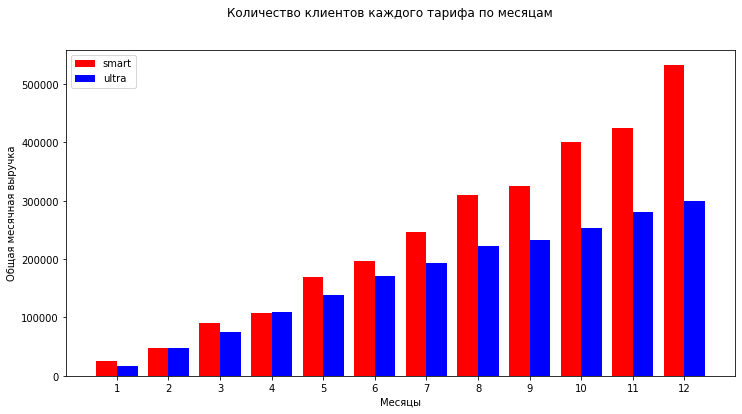

In [ ]:
X = x["1":"12"].columns
smart = x.loc["smart", :]
ultra = x.loc["ultra", :]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, smart, 0.4, label="smart", color=color1)
plt.bar(X_axis + 0.2, ultra, 0.4, label="ultra", color=color2)
plt.xticks(X_axis, X)
plt.xlabel("Месяцы")
plt.ylabel("Общая месячная выручка")
plt.suptitle('Количество клиентов каждого тарифа по месяцам')
plt.legend()
plt.show()

Посмотрим как менялось соотношение клиентов по каждому тарифу в процентном соотношении к общему числу:

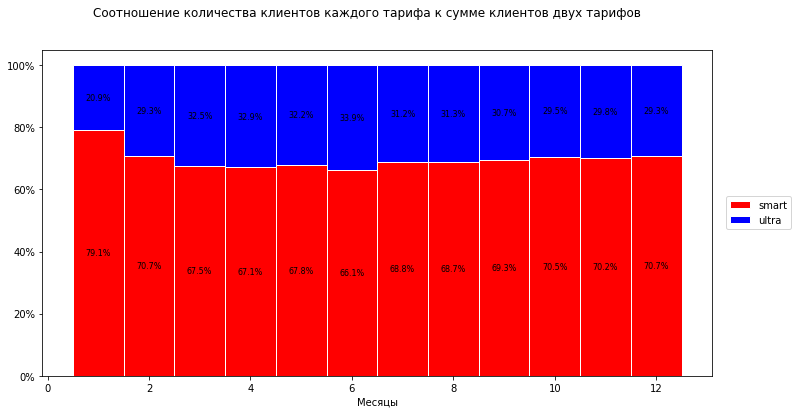

In [ ]:
x = df_all.pivot_table(index='tariff', columns='month', values='monthly_income', aggfunc='count')
x = x.groupby("tariff").agg(sum)
x = x.loc[:, 1:12]
barWidth = 1
fig, ax = plt.subplots()
bars1 = (x.loc["smart", :] / (x.loc["smart", :] + x.loc["ultra", :]))
bars2 = (x.loc["ultra", :] / (x.loc["smart", :] + x.loc["ultra", :]))
bars = np.add(bars1, bars2).tolist()
plt.bar(
    x.columns, bars1, color=color1, edgecolor="white", width=barWidth, label="smart"
)
plt.bar(
    x.columns,
    bars2,
    bottom=bars1,
    color=color2,
    edgecolor="white",
    width=barWidth,
    label="ultra",
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.legend(loc="center", bbox_to_anchor=(1.07, 0.5))
plt.suptitle(
    "Соотношение количества клиентов каждого тарифа к сумме клиентов двух тарифов"
)
plt.xlabel("Месяцы")
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    X = rect.get_x()
    y = rect.get_y()
    label_text = f'{height*100:.1f}%'
    label_x = X + width / 2
    label_y = y + height / 2
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
plt.show()

Первые месяцы можно не принимать в расчет для анализа, так как большинство клиентов из базы данных подключились в течение года. Поэтому, смотря на динамику изменения процентного соотношения количества клиентов каждого тарифа к общему числу клиентов, можно сказать, что по этому показателю, тариф «Смарт» тоже выигравает.

Давайте проанализируем, сколько человек в процентном соотношении прекратило пользоваться услугами Мегалайна и на каком тарифе эти клиенты были:

In [ ]:
df_users["churn_month"] = pd.DatetimeIndex(df_users["churn_date"]).month # переконвертируем дату выхода клиента из тарифа в месяц
x = df_users
x["gone"] = True  # создаем булевый столбец 'gone' который при конвертации в сводную таблицу примет значение False 
# если в churn_month будет пропуск
x = df_users.pivot_table(index=["user_id"], values="gone", columns="churn_month")
x = x.reset_index()
x["tariff"] = df_users["tariff"] # добавим информацию о тарифе
x = x.fillna(0)
x = x.groupby("tariff").agg(sum) #суммируем все True
x.columns = ["user_id", 8, 9, 10, 11, 12]
x = x.loc[:,8:12]
x

,8,9,10,11,12
tariff,,,,,
smart,2.0,2.0,6.0,4.0,14.0
ultra,0.0,1.0,3.0,4.0,2.0


Построим столбчатый график, какой процент пользователей прекратило пользоваться тарифом в зависимости от тарифа:

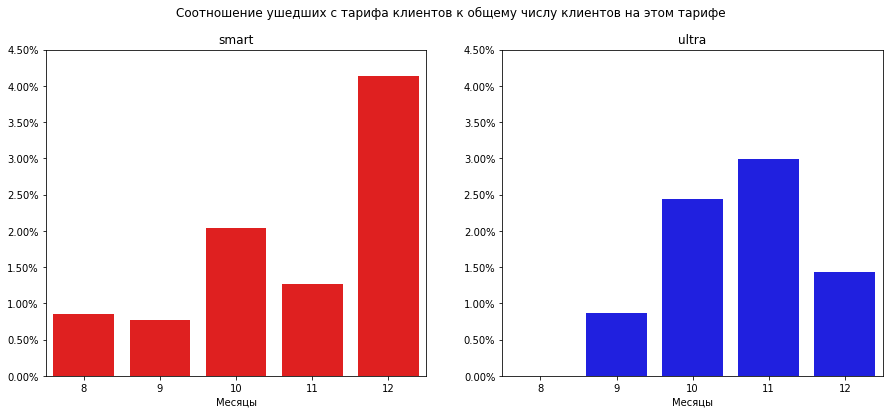

In [ ]:
y = df_all.pivot_table(index='tariff', columns='month', values='monthly_income', aggfunc='count') # делаем сводную таблицу суммарного количества клиентов по месяцам
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
bars1 = x.loc["smart", 8:12] * 100 / (y.loc["smart", 8:12]) # делим количество ушедших по тарифу на общее количество по тарифу
bars2 = x.loc["ultra", 8:12] * 100 / (y.loc["ultra", 8:12]) # делим количество ушедших по тарифу на общее количество по тарифу
sns.barplot(x=x.columns, y=bars1, color=color1, ax=axs[0])
sns.barplot(x=x.columns, y=bars2, color=color2, ax=axs[1])
fmt = "%.2f%%"
xticks = mtick.FormatStrFormatter(fmt)
axs[0].yaxis.set_major_formatter(xticks)
axs[1].yaxis.set_major_formatter(xticks)
axs[0].set_ylim([0, 4.5])
axs[1].set_ylim([0, 4.5])
axs[0].set_title("smart")
axs[1].set_title("ultra")
axs[0].set_xlabel("Месяцы")
axs[1].set_xlabel("Месяцы")
axs[0].set_ylabel("")
axs[1].set_ylabel("")
plt.suptitle(
    "Соотношение ушедших с тарифа клиентов к общему числу клиентов на этом тарифе"
)
plt.show()

График и данные об уходе клиентов не дают судить о каком то значимом различии тарифов.

Давайте узнаем, откуда основная выручка приходит с каждого из тарифов. Для этого создадим таблицу, где по каждой услуге найдем среднее значение выручки от этой услуги, разделив значения по тарифам:

In [ ]:
df_all

,user_id,month,count_calls,sum_calls,raw_calls,count_sms,used_net,abonent_cost,age,churn_date,city,first_name,last_name,reg_date,tariff,month_begin,month_end,month_active,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,earn_calls,earn_sms,earn_net,monthly_income,dummy
0,1000,5,17.0,159.0,150.06,22.0,2253.49,1950,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,0
1,1000,6,28.0,172.0,158.90,60.0,23233.77,1950,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,0
2,1000,7,41.0,340.0,318.80,75.0,14003.64,1950,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,0
3,1000,8,42.0,408.0,389.87,81.0,14055.93,1950,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,0
4,1000,9,46.0,466.0,440.14,57.0,14568.91,1950,52,NaT,краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,8,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,30.0,247.0,232.63,42.0,20579.36,550,68,2018-10-25,владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.0,4,50,15360,500,550,200,3,3,0.0,0.0,1200.0,1750.0,0
3212,1499,9,8.0,70.0,64.65,11.0,1845.75,550,35,NaT,пермь,Гектор,Корнилов,2018-09-27,smart,9,12.0,4,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0,0
3213,1499,10,44.0,449.0,429.91,48.0,17788.51,550,35,NaT,пермь,Гектор,Корнилов,2018-09-27,smart,9,12.0,4,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0,0
3214,1499,11,62.0,612.0,576.50,59.0,17963.31,550,35,NaT,пермь,Гектор,Корнилов,2018-09-27,smart,9,12.0,4,50,15360,500,550,200,3,3,336.0,27.0,600.0,1513.0,0


In [ ]:
data = df_all.groupby("tariff")["earn_calls"].agg("sum")  # создаем столбец с общей суммой выручки за определенную услугу оператора
data = data.to_frame()  # превращаем series в frame
x = df_all.groupby("tariff")["earn_sms"].agg("sum") # создаем столбец с общей суммой выручки за определенную услугу оператора
data = pd.concat([data, x], axis=1)  # добавляем в общую таблицу
x = df_all.groupby("tariff")["earn_net"].agg("sum")  # создаем столбец с общей суммой выручки за определенную услугу оператора
data = pd.concat([data, x], axis=1)  # добавляем в общую таблицу
x = df_all.groupby("tariff")["abonent_cost"].agg("sum") # создаем столбец с общей суммой выручки от абонентской платы
data = pd.concat([data, x], axis=1)  # добавляем в общую таблицу
data.columns = ["calls", "sms", "net", "abonent_fee"]
data["sum"] = data.agg("sum", axis=1)  # добавим столбец суммы выручки за все услуги оператора
data = data.T  # транспонируем таблицу
data

tariff,smart,ultra
calls,278217.0,0.0
sms,38784.0,0.0
net,1332400.0,118350.0
abonent_fee,1226500.0,1922700.0
sum,2875901.0,2041050.0


Построим столбчатый график на основании этих данных:

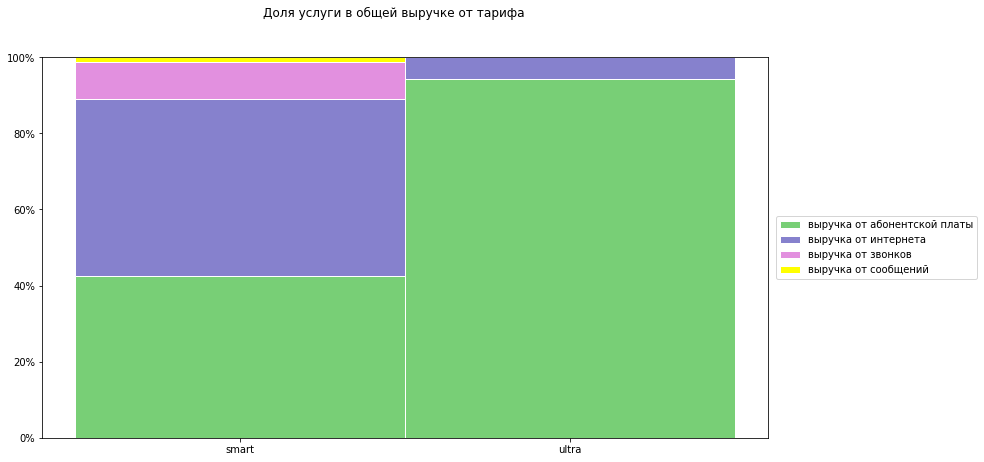

In [ ]:
barWidth = 1
fig, ax = plt.subplots(figsize=(13, 7))
x = data
bars3 = x.loc["calls", :] / x.loc["sum", :]
bars4 = x.loc["sms", :] / x.loc["sum", :]
bars2 = x.loc["net", :] / x.loc["sum", :]
bars1 = x.loc["abonent_fee", :] / x.loc["sum", :]
bars = np.add(bars1, bars2).tolist()
plt.bar(
    x.columns,
    bars1,
    color="#78cf76",
    edgecolor="white",
    width=barWidth,
    label="выручка от абонентской платы",
)
plt.bar(
    x.columns,
    bars2,
    bottom=np.array(bars1),
    color="#8681cd",
    edgecolor="white",
    width=barWidth,
    label="выручка от интернета",
)
plt.bar(
    x.columns,
    bars3,
    bottom=np.array(bars2) + np.array(bars1),
    color="#e290df",
    edgecolor="white",
    width=barWidth,
    label="выручка от звонков",
)
plt.bar(
    x.columns,
    bars4,
    bottom=np.array(bars3) + np.array(bars2) + np.array(bars1),
    color="yellow",
    edgecolor="white",
    width=barWidth,
    label="выручка от сообщений",
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.suptitle("Доля услуги в общей выручке от тарифа")
plt.legend(loc="center", bbox_to_anchor=(1.15, 0.5))
plt.show()

Заметно, что на тарифе «Ультры» клиенты платят в основном за абонентскую плату, на втором месте - за интернет, и больше - не за что.
На тарифе «Смарт» клиенты в общей массе отдают примерно поровну за интернет и за абонентскую плату.

Посчитаем, сколько месяцев клиенты тарифов платили только за абонетскую плату не превышая бесплатных лимитов:

In [ ]:
x = df_all.loc[df_all["monthly_income"].eq(550),['monthly_income','tariff']] # сортируем
x = x.groupby("tariff")["monthly_income"].agg("count") 
x

tariff
smart    568
Name: monthly_income, dtype: int64

In [ ]:
x = df_all.loc[df_all["monthly_income"].eq(1950),['monthly_income','tariff']] # сортируем
x = x.groupby("tariff")["monthly_income"].agg("count") 
x.drop(labels = ['smart'],axis = 0)

tariff
ultra    852
Name: monthly_income, dtype: int64

Узнаем сколько суммарно месяцев в 2018 году все вместе клиенты пользовались услугами Мегалайна:

In [ ]:
df_users.groupby("tariff").agg({"month_active": ["sum"]})

,month_active
,sum
tariff,
smart,2230
ultra,986


Соотношение времени пользования тарифами примерно равно соотношению количества клиентов двух тарифов друг к другу. 

При этом 568 месяцев из 2230 клиенты тарифа «Смарт» платили только за абонентскую плату, а абоненты тарифа «Ультра» - 852 из 986.
Это может свидетельствовать, что в тарифе «Ультра» бесплатные лимиты такие, что мало кто (13%) выходит за них.

**Вывод**

По данным потребляемых услуг заметно, что на тарифе «Ультра» клиенты используют больше сообщений, траффика и больше говорят по телефону, чем на тарифе «Смарт». При этом, наименьшая разница состоит в потреблении интернет-траффика. Видно, что в среднем клиенты «Ультры» не доходят до границ своих бесплатных лимитов (точнее совсем не доходят до лимитов сообщений и продолжительности звонков).

Клиент «Ультры» приносит в среднем больше выручки, но при этом, исходя из динамики роста, заметно, что средняя выручка от клиента «Смарт» приближается к средней от другого тарифа. Видно по статистике последних 9 месяцев, что доля клиентов «Смарта» в общем количестве растет. И растет доля суммарной выручки с этого тарифа к общей выручке с двух тарифов.
Эти факторы показывают, что тариф «Смарт» набирает популярность и производит больше дохода чем другой тариф, а «Ультра» - наоборот, теряет популярность.



## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Эта гипотеза о равенстве средних двух генеральных совокупностей, поэтому мы будем использовать метод st.stats.ttest_ind().

Нулевая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства. В данном случае,  нулевая гипотеза будет означать равенство средней выручки пользователей тарифов «Ультра» и «Смарт». 
Альтернативная гипотеза будет состоять в том, что средние выручки пользователей тарифов «Ультра» и «Смарт» не равны.  Это утверждение, которое принимается верным, если отбрасывается нулевая гипотеза.

[Дисперсии и размер двух выборок отличаются](#vyr_disp), поэтому аргументу `equal_var` зададим значение False.

Посчитаем уровень значимости для этой статистики:

In [ ]:
s1 = df_all.loc[df_all["tariff"] == "smart", "monthly_income"]
s2 = df_all.loc[df_all["tariff"] == "ultra", "monthly_income"]

results = scipy.stats.ttest_ind(s1, s2, equal_var=False)

print(results.pvalue)

1.927011394420941e-250


Итак, найденное значение p-value говорит о том, что вероятность получить такое или большее различие случайно близко к нулю, хотя средная выручка от тарифов неодинакова. Это явно слишком маленькая вероятность, чтобы делать вывод о равенстве средних выручек двух тарифов, выбрав в качестве критического уровня статистической значимости уровень в 5% или 10%.

Построив график с доверительными интервалами, видно, что они слишком удалены друг от друга:

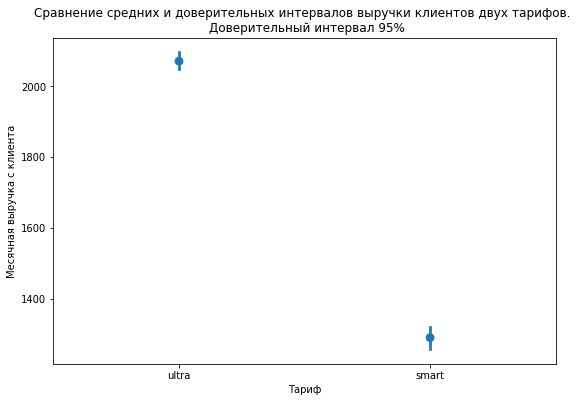

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.pointplot(x="tariff", y="monthly_income", data=df_all, dodge=True, join=False, ci=95)
plt.title('Сравнение средних и доверительных интервалов выручки клиентов двух тарифов. \n Доверительный интервал 95%')
plt.ylabel("Месячная выручка с клиента")
plt.xlabel("Тариф")
plt.show()

Вероятно, такой результат можно объяснить тем, что клиенты тарифов -  разные по платежеспособности категории.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Эта тоже гипотеза о равенстве средних двух генеральных совокупностей. 
Значит, опять будем использовать метод st.stats.ttest_ind().
Нулевая гипотеза будет означать равенство средней выручки пользователей из Москвы средней выручке пользователей из других регионов.
Альтернативная гипотеза будет состоять в том, что средняя выручка клиентов из Москвы отличается от выручки клиентов из других регионов. 


Отлично, теперь  проверим распределение значений средней выручки москвичей и не москвичей:

Количество москвичей: 99
Количество немосквичей: 401
Дисперсия средней выручки москвичей равна: : 565636.47
Дисперсия средней выручки немосквичей равна : 654069.57
Среднее от средней выручки москвичей равно : 1546.71
Среднее от средней выручки немосквичей равно : 1524.73


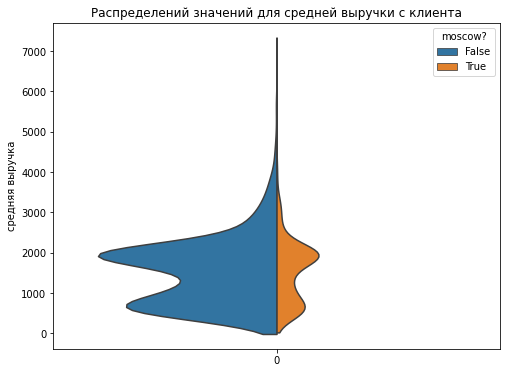

In [ ]:
x = df_all
x["dummy"] = 0
x["moscow?"] = (
    x["city"] == "москва"
)  # создадим столбец определяющий человек из москвы или нет
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(
    x="dummy",
    y="monthly_income",
    hue="moscow?",
    data=x.sort_values(by="monthly_income", ascending=True),
    split=True,
    scale="count",
    inner=None,
    bw=0.35,
)
ax.set_xlabel("")
ax.set_ylabel("средняя выручка")
ax.set_title("Распределений значений средней выручки с клиента")

a = x.loc[x["moscow?"] == True, "monthly_income"]
b = x.loc[x["moscow?"] == False, "monthly_income"]
print("Количество москвичей:", df_all[df_all["moscow?"]==True]['user_id'].drop_duplicates().count())
print("Количество немосквичей:", df_all[df_all["moscow?"]==False]['user_id'].drop_duplicates().count())
print("Дисперсия средней выручки москвичей равна: :", round(np.var(a, ddof=1),2))
print("Дисперсия средней выручки немосквичей равна :", round(np.var(b, ddof=1),2))
print("Среднее от средней выручки москвичей равно :", round(a.mean(),2))
print("Среднее от средней выручки немосквичей равно :", round(b.mean(),2))

Дисперсии и размеры выборок отличаются, поэтому аргументу `equal_var` зададим значение False. Средняя выручка по выборкам, вероятно, мало отличается друг от друга.

Посчитаем уровень значимости для этой статистики:

In [ ]:
s1 = df_all.loc[df_all["moscow?"] == True, "monthly_income"]
s2 = df_all.loc[df_all["moscow?"] == False, "monthly_income"]

results = scipy.stats.ttest_ind(s1, s2, equal_var=False)

print("p-значение: {:.3%}".format(results.pvalue))

p-значение: 52.170%


Итак, найденное значение p-value говорит о том, что вероятность получить такое или большее различие очень велико. При условии, что нулевая гипотеза верна, это слишком большая вероятность, чтобы делать вывод об различии средних выручек москвичей и немосквичей.
Руководствуясь принципом описаном на https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/
и взяв в качестве критического уровня статистической значимости уровень в 5% или 10%, наша гипотеза о равенстве средних выручек совокупностей не может быть отвергнута.

И действительно, построив график с доверительными интервалами, видно, что доверительные интервалы взаимопроникают друг в друга:

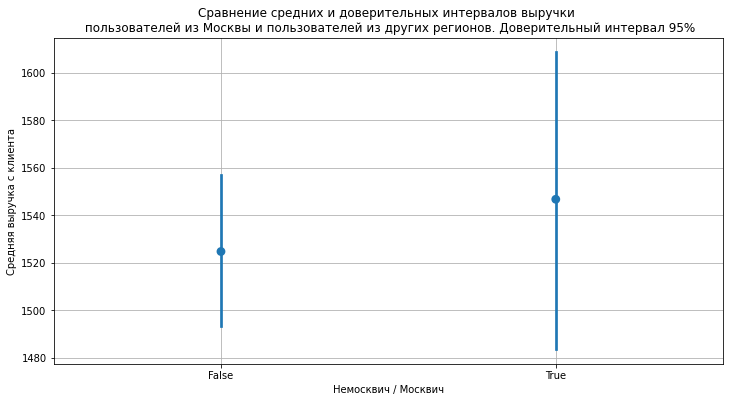

In [ ]:
sns.pointplot(x="moscow?", y="monthly_income", data=df_all, dodge=True, join=False, ci=95)
plt.title('Сравнение средних и доверительных интервалов выручки \n пользователей из Москвы и пользователей из других регионов. Доверительный интервал 95%')
plt.ylabel("Средняя выручка с клиента")
plt.xlabel("Немосквич / Москвич")
plt.grid()
plt.show()

Вероятно, такой результат можно объяснить тем, что клиенты оператора не отличаются поведением в потреблении услуг оператора в зависимости от территориального признака.

## Вывод

Чтобы понять какой тариф лучше, был проведен анализ 3 факторов в динамике и статике: общей выручке с клиентов тарифа, средней выручке с клиента, отношение количества клиентов тарифа к общему количеству.

Только по одному признаку тариф «Ультра» все еще лидирует - это показатель средней выручки с клиента в статике. И это лидерство может быть временным. Во всех остальных случаях тариф «Смарт» уже взял верх, и можно сказать, что более прибыльный, не учитывая издержки.

Маркетологам надо понять, почему «Ультра» такой непопулярный, и как сделать его более выгодным перед другим тарифом.
Мы лишь можешь порекомендовать обратить внимание на высокую стоимость абонентской платы «Ультры».

